# Average Directional Index Jupyter Notebook for Data Visualization

<br />
A visualization of ADX and Stock Prices using 1 month of stock data and 5 minute candles from Amazon, Apple, and Google. Average Directional Index is calculated based on a 20-period.

<br /><br/>
Below you will find the Python script and data visualizations:
<br /><br/>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


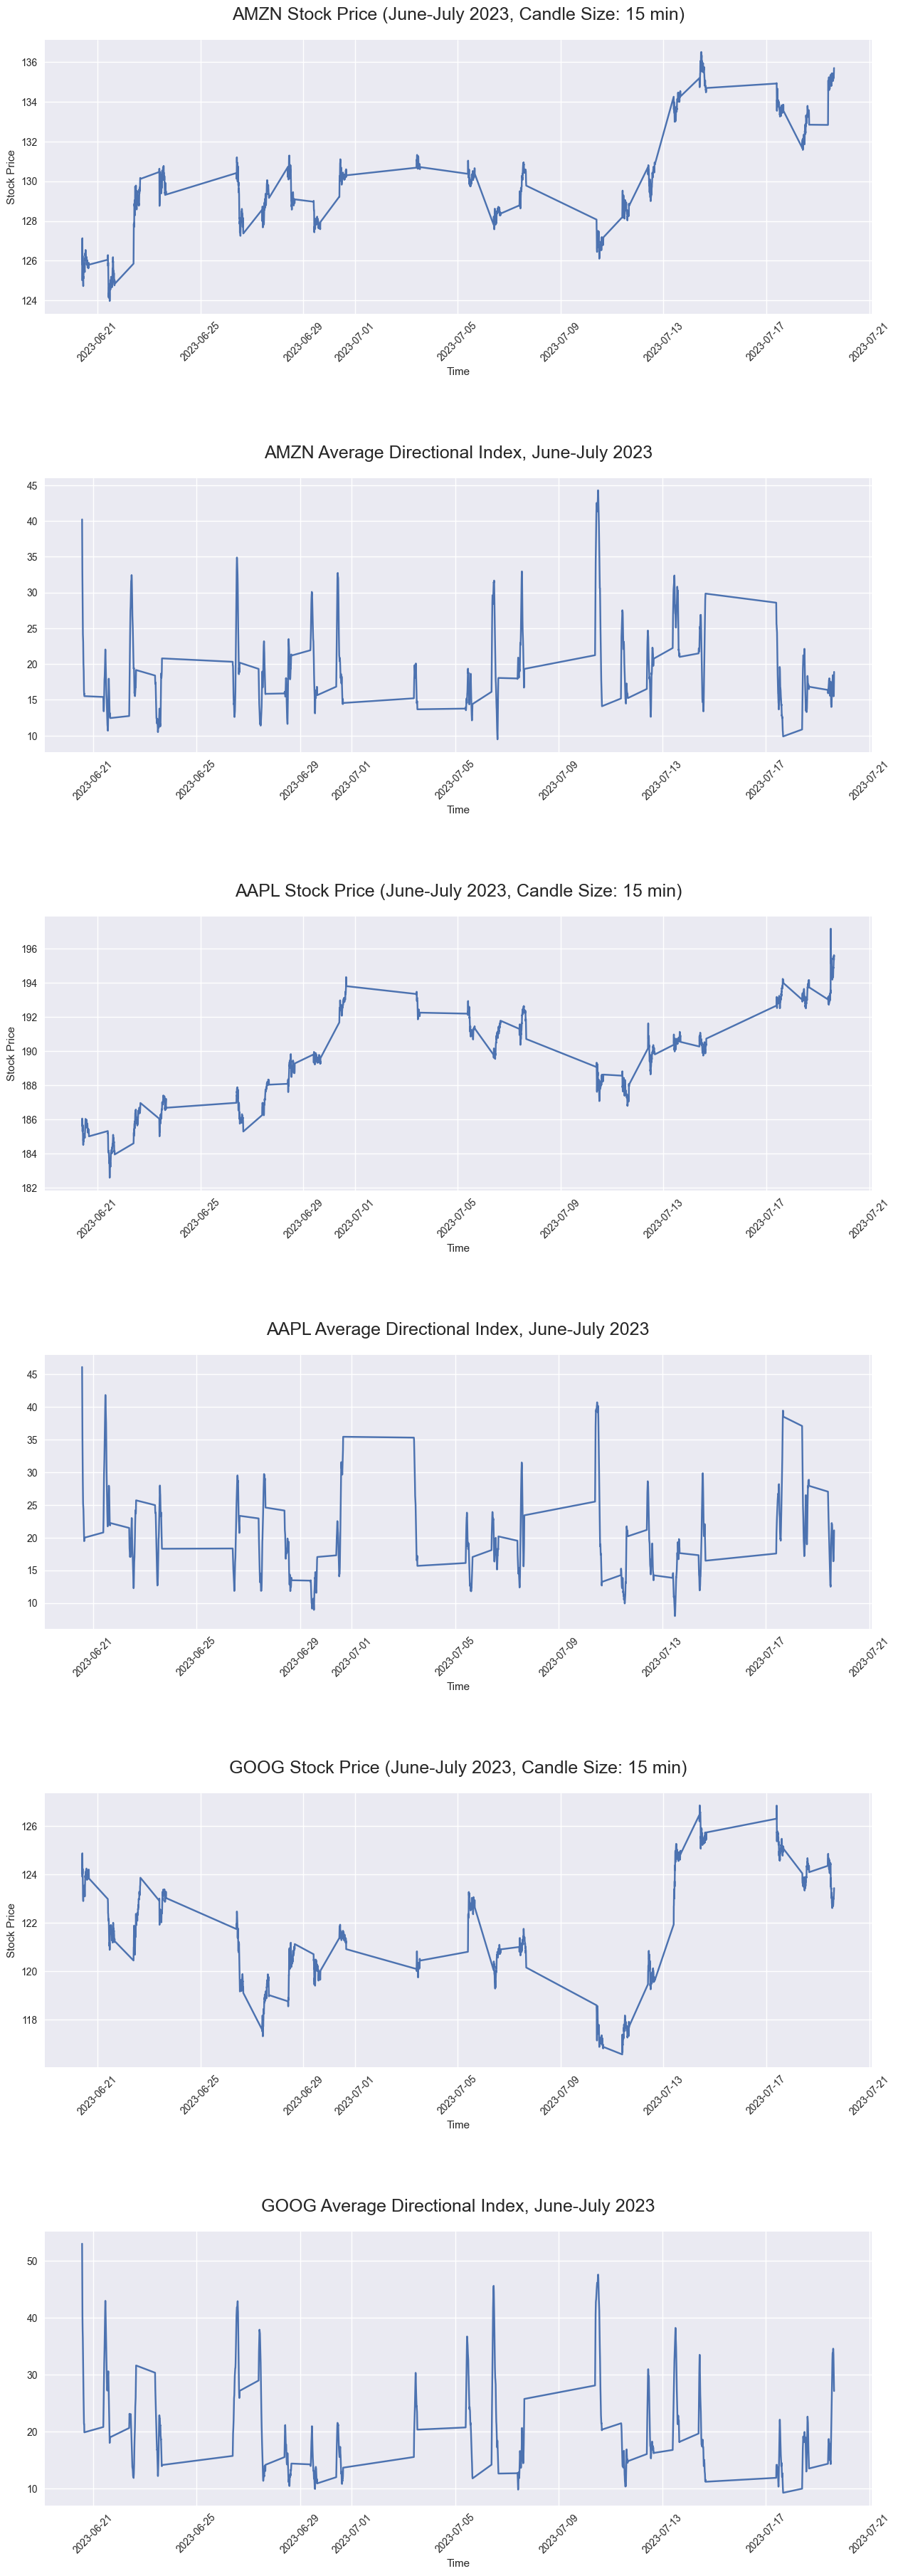

In [4]:
# --------------------------------------------------------
# Author: Daniel Xu
# Date: 07/14/2023
# Description: A program that computes Average Directional Index technical indicator
#   for various stocks
# ADI Calculation:
#   Up Movement = Current High - Previous High
#   Down Movement = Previous Low - Current Low
#   +DM = Up Movement > Down Movement  && Up Movement > 0 ? +DM = Up Movement : +DM = 0
#   -DM = Down Movement > Up Movement  && Down Movement > 0 ? -DM = Down Movement : -DM = 0
#   +DI = 100 * EMA(+DM / ATR)
#   -DI = 100 * EMA(-DM / ATR)
#   ADX = 100 * EMA(abs[(+DI - -DI) / (+DI + -DI)])
# --------------------------------------------------------

# Import libraries
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style

# AVERAGE_TRUE_RANGE - returns the ATR column of the DataFrame
def average_true_range(df, window):
    df_copy = df.copy()
    df_copy['High-Low'] = df_copy['High'] - df_copy['Low']
    df_copy['High-PC'] = df_copy['High'] - df['Adj Close'].shift(1) # shift to PREVIOUS close
    df_copy['Low-PC'] = df_copy['Low'] - df['Adj Close'].shift(1)
    df_copy['True Range'] = df_copy[['High-Low', 'High-PC', 'Low-PC']].max(axis=1, skipna=False)
    
    # Using 'com' instead of 'span' will get us closer to yfinance's Exponential Moving Average
    #   'span' is closer to TradingView's algorithm for EMA
    df_copy['ATR'] = df_copy['True Range'].ewm(span=window, min_periods=window).mean()
    
    return df_copy['ATR']

# AVERAGE_DIRECTIONAL_INDEX - returns the ADX column of specified DF
def average_directional_index(df, window):
    temp = df.copy()
    temp['UpMove'] = temp['High'] - temp['High'].shift(1)
    temp['DownMove'] = temp['Low'].shift(1) - temp['Low']
    temp['+DM'] = np.where((temp['UpMove'] > temp['DownMove']) & (temp['UpMove'] > 0), temp['UpMove'], 0)
    temp['-DM'] = np.where((temp['DownMove'] > temp['UpMove']) & (temp['DownMove'] > 0), temp['DownMove'], 0)
    temp['ATR'] = average_true_range(temp, 14)
    temp['+DI'] = 100 * (temp['+DM'] / temp['ATR']).ewm(com=window, min_periods=window).mean()
    temp['-DI'] = 100 * (temp['-DM'] / temp['ATR']).ewm(com=window, min_periods=window).mean()
    temp['ADX'] = 100 * abs((temp['+DI'] - temp['-DI']) / (temp['+DI'] + temp['-DI'])).ewm(com=window, min_periods=window).mean()

    return temp['ADX']

# Download historical data for various stocks
tickers = ['AMZN', 'AAPL', 'GOOG']
stock_data = {}

for t in tickers:
    data = yf.download(t, period='1mo', interval='5m') # 5 minute candles
    data.dropna(how='any', inplace=True)
    stock_data[t] = data
    
for s in stock_data:
    stock_data[s]['ADX'] = average_directional_index(stock_data[s], 20)


%matplotlib inline

# Initialize the Matplotlib plot
fig = plt.figure(figsize=(15, 45))
gs = gridspec.GridSpec(6, 1, figure=fig)
style.use('seaborn-v0_8')

# Add subplots for all graphs, using gridspec to properly set spacing
ax1 = fig.add_subplot(gs[0:1])
ax1a = fig.add_subplot(gs[1:2])
ax2 = fig.add_subplot(gs[2:3])
ax2a = fig.add_subplot(gs[3:4])
ax3 = fig.add_subplot(gs[4:5])
ax3a = fig.add_subplot(gs[5:6])

# AMZN Generic Stock Price
ax1.set_title("AMZN Stock Price (June-July 2023, Candle Size: 15 min)", fontsize=18, pad=20)
ax1.set_xlabel("Time")
ax1.set_ylabel("Stock Price")
ax1.plot(stock_data['AMZN'].index, stock_data['AMZN']['Close'], label='Close')
ax1.tick_params(axis='x', rotation=45)

# ADX Technical Indicator Graph for AMZN
ax1a.set_title("AMZN Average Directional Index, June-July 2023", fontsize=18, pad=20)
ax1a.set_xlabel("Time")
ax1a.plot(stock_data['AMZN'].index, stock_data['AMZN']['ADX'], label='ADX')
ax1a.tick_params(axis='x', rotation=45)

# AAPL Generic Stock Price
ax2.set_title("AAPL Stock Price (June-July 2023, Candle Size: 15 min)", fontsize=18, pad=20)
ax2.set_xlabel("Time")
ax2.set_ylabel("Stock Price")
ax2.plot(stock_data['AAPL'].index, stock_data['AAPL']['Close'])
ax2.tick_params(axis='x', rotation=45)

# ADX Technical Indicator Graph for AAPL
ax2a.set_title("AAPL Average Directional Index, June-July 2023", fontsize=18, pad=20)
ax2a.set_xlabel("Time")
ax2a.plot(stock_data['AAPL'].index, stock_data['AAPL']['ADX'], label='ADX')
ax2a.tick_params(axis='x', rotation=45)

# GOOG Generic Stock Price
ax3.set_title("GOOG Stock Price (June-July 2023, Candle Size: 15 min)", fontsize=18, pad=20)
ax3.set_xlabel("Time")
ax3.set_ylabel("Stock Price")
ax3.plot(stock_data['GOOG'].index, stock_data['GOOG']['Close'])
ax3.tick_params(axis='x', rotation=45)

# ADX Technical Indicator Graph for GOOG
ax3a.set_title("GOOG Average Directional Index, June-July 2023", fontsize=18, pad=20)
ax3a.set_xlabel("Time")
ax3a.plot(stock_data['GOOG'].index, stock_data['GOOG']['ADX'], label='ADX')
ax3a.tick_params(axis='x', rotation=45)

gs.update(hspace=0.6)  # Adjust the hspace value to increase or decrease vertical spacing

plt.show()